# Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('C:/Users/sundooedu/Desktop/pubg-finish-placement-prediction/train_V2.csv')

In [3]:
train['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [4]:
train_solo = train[train['matchType']=='solo']
train_duo = train[train['matchType']=='duo']
train_squad = train[train['matchType']=='squad']
d = train[train['matchType']=='solo-fpp']
e = train[train['matchType']=='duo-fpp']
f = train[train['matchType']=='squad-fpp']

In [5]:
train_solo = pd.concat([train_solo,d],axis=0)
train_duo = pd.concat([train_duo,e],axis=0)

In [6]:
train_squad = pd.concat([train_squad,f],axis=0)

- DBNOs - Number of enemy players knocked.
- headshotKills - Number of enemy players killed with headshots.
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- kills - Number of enemy players killed.
- killStreaks - Max number of enemy players killed in a short amount of time.
- longestKill - Longest distance between player and player killed at time of - death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- rideDistance - Total distance traveled in vehicles measured in meters.
- teamKills - Number of times this player killed a teammate.
- walkDistance - Total distance traveled on foot measured in meters.
- winPoints - Win-based external ranking of player. (Think of this as an Elo - ranking where only winning matters.)
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [7]:
train_squad

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.60,0,0,0,64,...,0,0.0,0,0.000,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.27,0,0,0,74,...,0,0.0,0,0.000,0,0,65.67,1,0,0.2143
40,ffd9e56f13438e,8df2112760f9e2,3f8b160eeee685,0,1,61.90,1,0,1,31,...,0,529.1,0,0.000,0,0,327.30,2,0,0.3200
55,d79cdeb0ac6eb5,82ff744317632e,6c79fb59bd74c2,2,4,560.80,5,2,9,4,...,0,0.0,0,0.000,0,0,2190.00,7,1534,0.6400
71,83d0b9e08b6e72,1246493aa7619b,55a60d2026f67e,0,3,408.00,2,0,0,5,...,0,0.0,0,226.000,0,0,2135.00,5,1471,0.7667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.90,0,0,1,77,...,1,0.0,0,0.000,0,0,828.30,7,0,0.1071
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,...,0,180.4,0,0.000,0,0,845.60,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.00,3,1507,0.1786
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.70,4,0,0.4815


In [8]:
train_squad.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [9]:
train_squad

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.60,0,0,0,64,...,0,0.0,0,0.000,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.27,0,0,0,74,...,0,0.0,0,0.000,0,0,65.67,1,0,0.2143
40,ffd9e56f13438e,8df2112760f9e2,3f8b160eeee685,0,1,61.90,1,0,1,31,...,0,529.1,0,0.000,0,0,327.30,2,0,0.3200
55,d79cdeb0ac6eb5,82ff744317632e,6c79fb59bd74c2,2,4,560.80,5,2,9,4,...,0,0.0,0,0.000,0,0,2190.00,7,1534,0.6400
71,83d0b9e08b6e72,1246493aa7619b,55a60d2026f67e,0,3,408.00,2,0,0,5,...,0,0.0,0,226.000,0,0,2135.00,5,1471,0.7667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.90,0,0,1,77,...,1,0.0,0,0.000,0,0,828.30,7,0,0.1071
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,...,0,180.4,0,0.000,0,0,845.60,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.00,3,1507,0.1786
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.70,4,0,0.4815


In [10]:
#train_solo.to_csv('train_solo.csv',header=False)
# train_duo.to_csv('train_duo.csv',header=False)
# train_squad.to_csv('train_squad.csv')

## 독립변수 설명

- groupId - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.
-  assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- DBNOs - Number of enemy players knocked.
headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- kills - Number of enemy players killed.
- killStreaks - Max number of enemy players killed in a short amount of time.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- numGroups - Number of groups we have data for in the match.
revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Use jamovi

- jamovi로 독립변수들의 관계가 유의한지 확인한다.



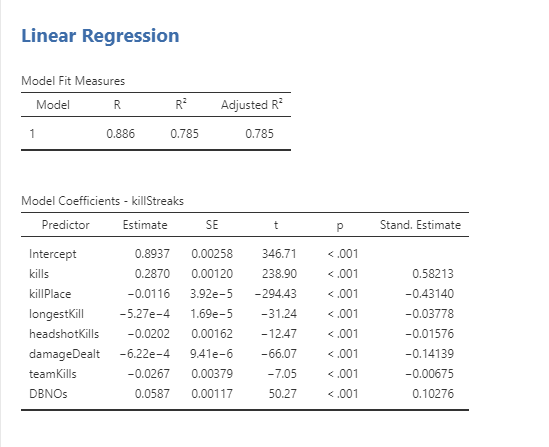

## squad

- DBNOs - Number of enemy players knocked.
- headshotKills - Number of enemy players killed with headshots.
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- kills - Number of enemy players killed.
- killStreaks - Max number of enemy players killed in a short amount of time.
- longestKill - Longest distance between player and player killed at time of - death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- rideDistance - Total distance traveled in vehicles measured in meters.
- teamKills - Number of times this player killed a teammate.
- walkDistance - Total distance traveled on foot measured in meters.
- winPoints - Win-based external ranking of player. (Think of this as an Elo - ranking where only winning matters.)
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [11]:
train_squad

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.60,0,0,0,64,...,0,0.0,0,0.000,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.27,0,0,0,74,...,0,0.0,0,0.000,0,0,65.67,1,0,0.2143
40,ffd9e56f13438e,8df2112760f9e2,3f8b160eeee685,0,1,61.90,1,0,1,31,...,0,529.1,0,0.000,0,0,327.30,2,0,0.3200
55,d79cdeb0ac6eb5,82ff744317632e,6c79fb59bd74c2,2,4,560.80,5,2,9,4,...,0,0.0,0,0.000,0,0,2190.00,7,1534,0.6400
71,83d0b9e08b6e72,1246493aa7619b,55a60d2026f67e,0,3,408.00,2,0,0,5,...,0,0.0,0,226.000,0,0,2135.00,5,1471,0.7667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.90,0,0,1,77,...,1,0.0,0,0.000,0,0,828.30,7,0,0.1071
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,...,0,180.4,0,0.000,0,0,845.60,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.00,3,1507,0.1786
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.70,4,0,0.4815


In [12]:
train_squad.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

# 표본화

In [13]:
from sklearn.model_selection import train_test_split

x_test,x_train,y_test,y_train = train_test_split(train_squad.drop(['Id','groupId','matchId','matchType'],axis=1),train_squad['longestKill'],test_size = 0.1,random_state=0)

test1 =x_train

# x_test2,x_train2,y_test2,y_train2 = train_test_split(train_squad.drop(['Id','groupId','matchId','matchType'],axis=1),train_squad['longestKill'],test_size = 0.2)

# test2 =x_train2


In [14]:
test1.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [15]:
test1.reset_index(drop=True,inplace=True)
#test2.reset_index(drop=True,inplace=True)

In [16]:
test1

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,1,2,98.95,2,0,12,12,0,2,2,...,2,0.0,0,0.0,0,0,2339.0,2,0,0.7586
1,0,0,0.00,0,0,0,68,0,0,0,...,0,0.0,0,0.0,0,0,212.0,0,0,0.3667
2,1,1,137.70,1,1,7,21,0,1,1,...,0,740.5,0,0.0,0,0,2051.0,3,0,1.0000
3,1,0,26.67,1,0,0,41,0,1,1,...,0,0.0,0,0.0,0,0,108.6,1,0,0.0357
4,0,0,0.00,0,0,0,74,1248,0,0,...,0,0.0,0,0.0,0,0,140.3,1,1491,0.1429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238267,1,0,120.00,1,0,1,73,0,0,0,...,2,0.0,0,0.0,0,0,432.6,4,0,0.1852
238268,0,0,0.00,0,0,0,78,1387,0,0,...,0,0.0,0,0.0,0,0,118.0,1,1574,0.1379
238269,2,6,130.20,0,0,7,43,1377,0,0,...,1,1765.0,0,0.0,0,0,2928.0,9,1579,0.7500
238270,0,0,21.29,0,0,0,68,0,0,0,...,0,0.0,0,0.0,0,0,888.3,4,0,0.2143


- jamovi에서 돌려보기 위해 추출

In [17]:
#test1.to_csv("squad_test1_0.1.csv")
#test2.to_csv("squad_test2_0.2.csv")

- KMeans

In [18]:
x =test1[['kills','killPlace','killStreaks']]
x

,kills,killPlace,killStreaks
0,2,12,2
1,0,68,0
2,1,21,1
3,1,41,1
4,0,74,0
...,...,...,...
238267,0,73,0
238268,0,78,0
238269,0,43,0
238270,0,68,0


<function matplotlib.pyplot.show(*args, **kw)>

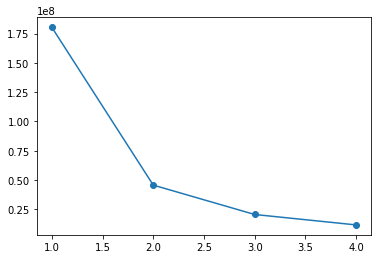

In [19]:
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
distortions = []
for i in range(1,5):
    kmeans =KMeans(n_clusters=i,n_init=10,max_iter=300) #Elbow Method
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)
plt.plot(range(1,5),distortions,marker='o')
plt.show

- silhouette

In [20]:
kmeans = KMeans(n_clusters = 3, max_iter=100) #silhouette
y_pred = kmeans.fit_predict(x)
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(x,labels=kmeans.labels_)

0.585335402678724

In [21]:
kmeans.cluster_centers_

array([[2.40845262e+00, 1.64690351e+01, 1.36303741e+00],
       [5.73985304e-13, 8.00419110e+01, 3.79252185e-13],
       [2.68716827e-01, 4.84851769e+01, 2.68716827e-01]])

- 종속변수 추출

In [22]:
y = kmeans.labels_

In [23]:
kmeans = KMeans(n_clusters = 2, max_iter=300) #silhouette
y_pred = kmeans.fit_predict(x)
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(x,labels=kmeans.labels_)

0.6240229118014109

In [24]:
kmeans.cluster_centers_

array([[1.82023863e+00, 2.39761289e+01, 1.10813132e+00],
       [2.34291978e-03, 7.14811688e+01, 2.34291978e-03]])

In [25]:
y2=kmeans.labels_

In [26]:
y2

array([0, 1, 0, ..., 0, 1, 1])

In [27]:
y=pd.DataFrame(y)

In [28]:
result_squad_1 = pd.concat([x,y],axis=1)
result_squad_1.columns=['kills','killPlace','killStreaks','target']

In [29]:
result_squad_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238272 entries, 0 to 238271
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   kills        238272 non-null  int64
 1   killPlace    238272 non-null  int64
 2   killStreaks  238272 non-null  int64
 3   target       238272 non-null  int32
dtypes: int32(1), int64(3)
memory usage: 6.4 MB


In [30]:
result_squad_1.describe(include='all')

,kills,killPlace,killStreaks,target
count,238272.000000,238272.000000,238272.000000,238272.000000
mean,0.908445,47.803015,0.553506,0.998116
std,1.502502,27.464481,0.737957,0.822894
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000
50%,0.000000,48.000000,0.000000,1.000000
75%,1.000000,71.000000,1.000000,2.000000
max,22.000000,100.000000,8.000000,2.000000


In [31]:
squad0=result_squad_1[result_squad_1['target']==0]

In [32]:
squad1=result_squad_1[result_squad_1['target']==1]

In [33]:
squad2=result_squad_1[result_squad_1['target']==2]

In [34]:
squad0.describe()

,kills,killPlace,killStreaks,target
count,80898.000000,80898.000000,80898.000000,80898.0
mean,2.408453,16.469035,1.363037,0.0
std,1.735507,9.230870,0.617444,0.0
min,0.000000,1.000000,0.000000,0.0
25%,1.000000,8.000000,1.000000,0.0
50%,2.000000,16.000000,1.000000,0.0
75%,3.000000,24.000000,2.000000,0.0
max,22.000000,32.000000,8.000000,0.0


In [35]:
squad1.describe()

,kills,killPlace,killStreaks,target
count,76925.0,76925.000000,76925.0,76925.0
mean,0.0,80.041911,0.0,1.0
std,0.0,9.228334,0.0,0.0
min,0.0,65.000000,0.0,1.0
25%,0.0,72.000000,0.0,1.0
50%,0.0,80.000000,0.0,1.0
75%,0.0,88.000000,0.0,1.0
max,0.0,100.000000,0.0,1.0


In [36]:
squad2.describe()

,kills,killPlace,killStreaks,target
count,80449.000000,80449.000000,80449.000000,80449.0
mean,0.268717,48.485177,0.268717,2.0
std,0.443295,9.238891,0.443295,0.0
min,0.000000,33.000000,0.000000,2.0
25%,0.000000,41.000000,0.000000,2.0
50%,0.000000,48.000000,0.000000,2.0
75%,1.000000,56.000000,1.000000,2.0
max,1.000000,64.000000,1.000000,2.0


C:\Users\sundooedu\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sundooedu\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


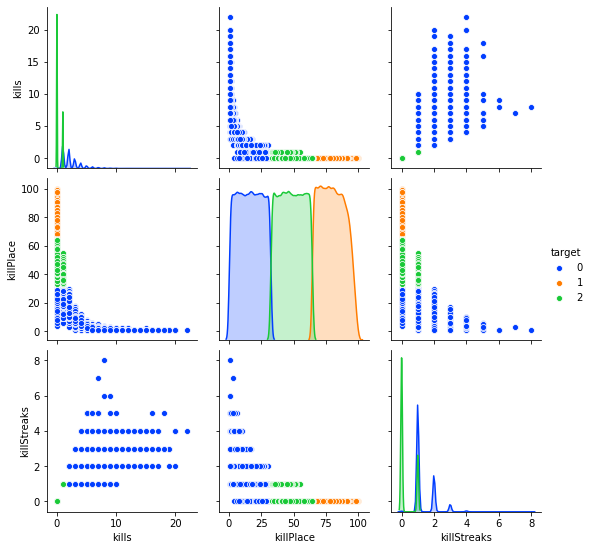

In [37]:
import seaborn as sns
sns.pairplot(result_squad_1,diag_kind='kde',hue="target",palette='bright')
plt.show()

# 컬럼변경

In [38]:
test1.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [39]:
x_1 =test1[['killPlace','kills','killStreaks','longestKill','headshotKills'\
           ,'damageDealt','teamKills','DBNOs']]
x_1

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs
0,12,2,2,47.260,0,98.95,0,2
1,68,0,0,0.000,0,0.00,0,0
2,21,1,1,60.210,1,137.70,0,1
3,41,1,1,1.665,0,26.67,0,1
4,74,0,0,0.000,0,0.00,0,0
...,...,...,...,...,...,...,...,...
238267,73,0,0,0.000,0,120.00,0,1
238268,78,0,0,0.000,0,0.00,0,0
238269,43,0,0,0.000,0,130.20,0,0
238270,68,0,0,0.000,0,21.29,0,0


<function matplotlib.pyplot.show(*args, **kw)>

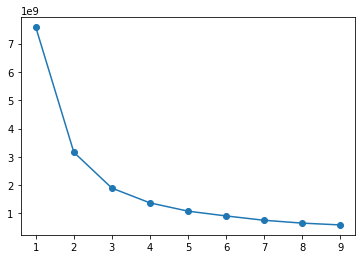

In [40]:
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
distortions = []
for i in range(1,10):
    kmeans =KMeans(n_clusters=i,n_init=10,max_iter=100) #Elbow Method
    kmeans.fit(x_1)
    distortions.append(kmeans.inertia_)
plt.plot(range(1,10),distortions,marker='o')
plt.show

In [41]:
kmeans = KMeans(n_clusters = 2, max_iter=100) #silhouette
y_pred = kmeans.fit_predict(x_1)
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(x_1,labels=kmeans.labels_)

0.6575354840060413

In [42]:
kmeans.cluster_centers_

array([[5.49834040e+01, 4.30225679e-01, 3.55210130e-01, 1.17148914e+01,
        9.94847264e-02, 7.22534979e+01, 2.75790230e-02, 4.72570149e-01],
       [1.27528694e+01, 3.24281095e+00, 1.52146225e+00, 8.11631404e+01,
        8.07987560e-01, 4.25263037e+02, 3.42852911e-02, 2.82417989e+00]])

In [43]:
y_1_1=kmeans.labels_
y_1_1=pd.DataFrame(y_1_1)
result_squad_1 = pd.concat([x_1,y_1_1],axis=1)

In [44]:
result_squad_1

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,0
0,12,2,2,47.260,0,98.95,0,2,0
1,68,0,0,0.000,0,0.00,0,0,0
2,21,1,1,60.210,1,137.70,0,1,0
3,41,1,1,1.665,0,26.67,0,1,0
4,74,0,0,0.000,0,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...
238267,73,0,0,0.000,0,120.00,0,1,0
238268,78,0,0,0.000,0,0.00,0,0,0
238269,43,0,0,0.000,0,130.20,0,0,0
238270,68,0,0,0.000,0,21.29,0,0,0


In [45]:
result_squad_1.columns=['killPlace','kills','killStreaks',\
                        'longestKill','headshotKills','damageDealt','teamKills','DBNOs',\
                        'target']

In [46]:
result_squad_1

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,target
0,12,2,2,47.260,0,98.95,0,2,0
1,68,0,0,0.000,0,0.00,0,0,0
2,21,1,1,60.210,1,137.70,0,1,0
3,41,1,1,1.665,0,26.67,0,1,0
4,74,0,0,0.000,0,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...
238267,73,0,0,0.000,0,120.00,0,1,0
238268,78,0,0,0.000,0,0.00,0,0,0
238269,43,0,0,0.000,0,130.20,0,0,0
238270,68,0,0,0.000,0,21.29,0,0,0


In [47]:
squad0_0=result_squad_1[result_squad_1['target']==0]
squad0_1=result_squad_1[result_squad_1['target']==1]

In [48]:
squad0_0.describe()

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,target
count,197706.000000,197706.000000,197706.000000,197706.000000,197706.000000,197706.000000,197706.000000,197706.000000,197706.0
mean,54.992539,0.429815,0.354987,11.704392,0.099380,72.206800,0.027571,0.472307,0.0
std,23.979446,0.712054,0.551567,32.896020,0.322177,71.749183,0.184209,0.703292,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,56.000000,0.000000,0.000000,0.000000,0.000000,57.200000,0.000000,0.000000,0.0
75%,75.000000,1.000000,1.000000,6.568000,0.000000,119.800000,0.000000,1.000000,0.0
max,100.000000,6.000000,5.000000,721.200000,4.000000,264.200000,4.000000,15.000000,0.0


In [49]:
squad0_1.describe()

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,target
count,40566.000000,40566.000000,40566.000000,40566.000000,40566.000000,40566.000000,40566.000000,40566.000000,40566.0
mean,12.763521,3.241138,1.521027,81.123577,0.807573,425.029414,0.034314,2.822388,1.0
std,12.181422,2.056932,0.766705,84.153664,1.005665,193.708722,0.205330,1.715995,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,149.300000,0.000000,0.000000,1.0
25%,5.000000,2.000000,1.000000,22.740000,0.000000,296.100000,0.000000,2.000000,1.0
50%,9.000000,3.000000,1.000000,52.960000,1.000000,364.900000,0.000000,3.000000,1.0
75%,17.000000,4.000000,2.000000,113.000000,1.000000,489.300000,0.000000,4.000000,1.0
max,98.000000,22.000000,8.000000,990.900000,15.000000,3387.000000,4.000000,25.000000,1.0


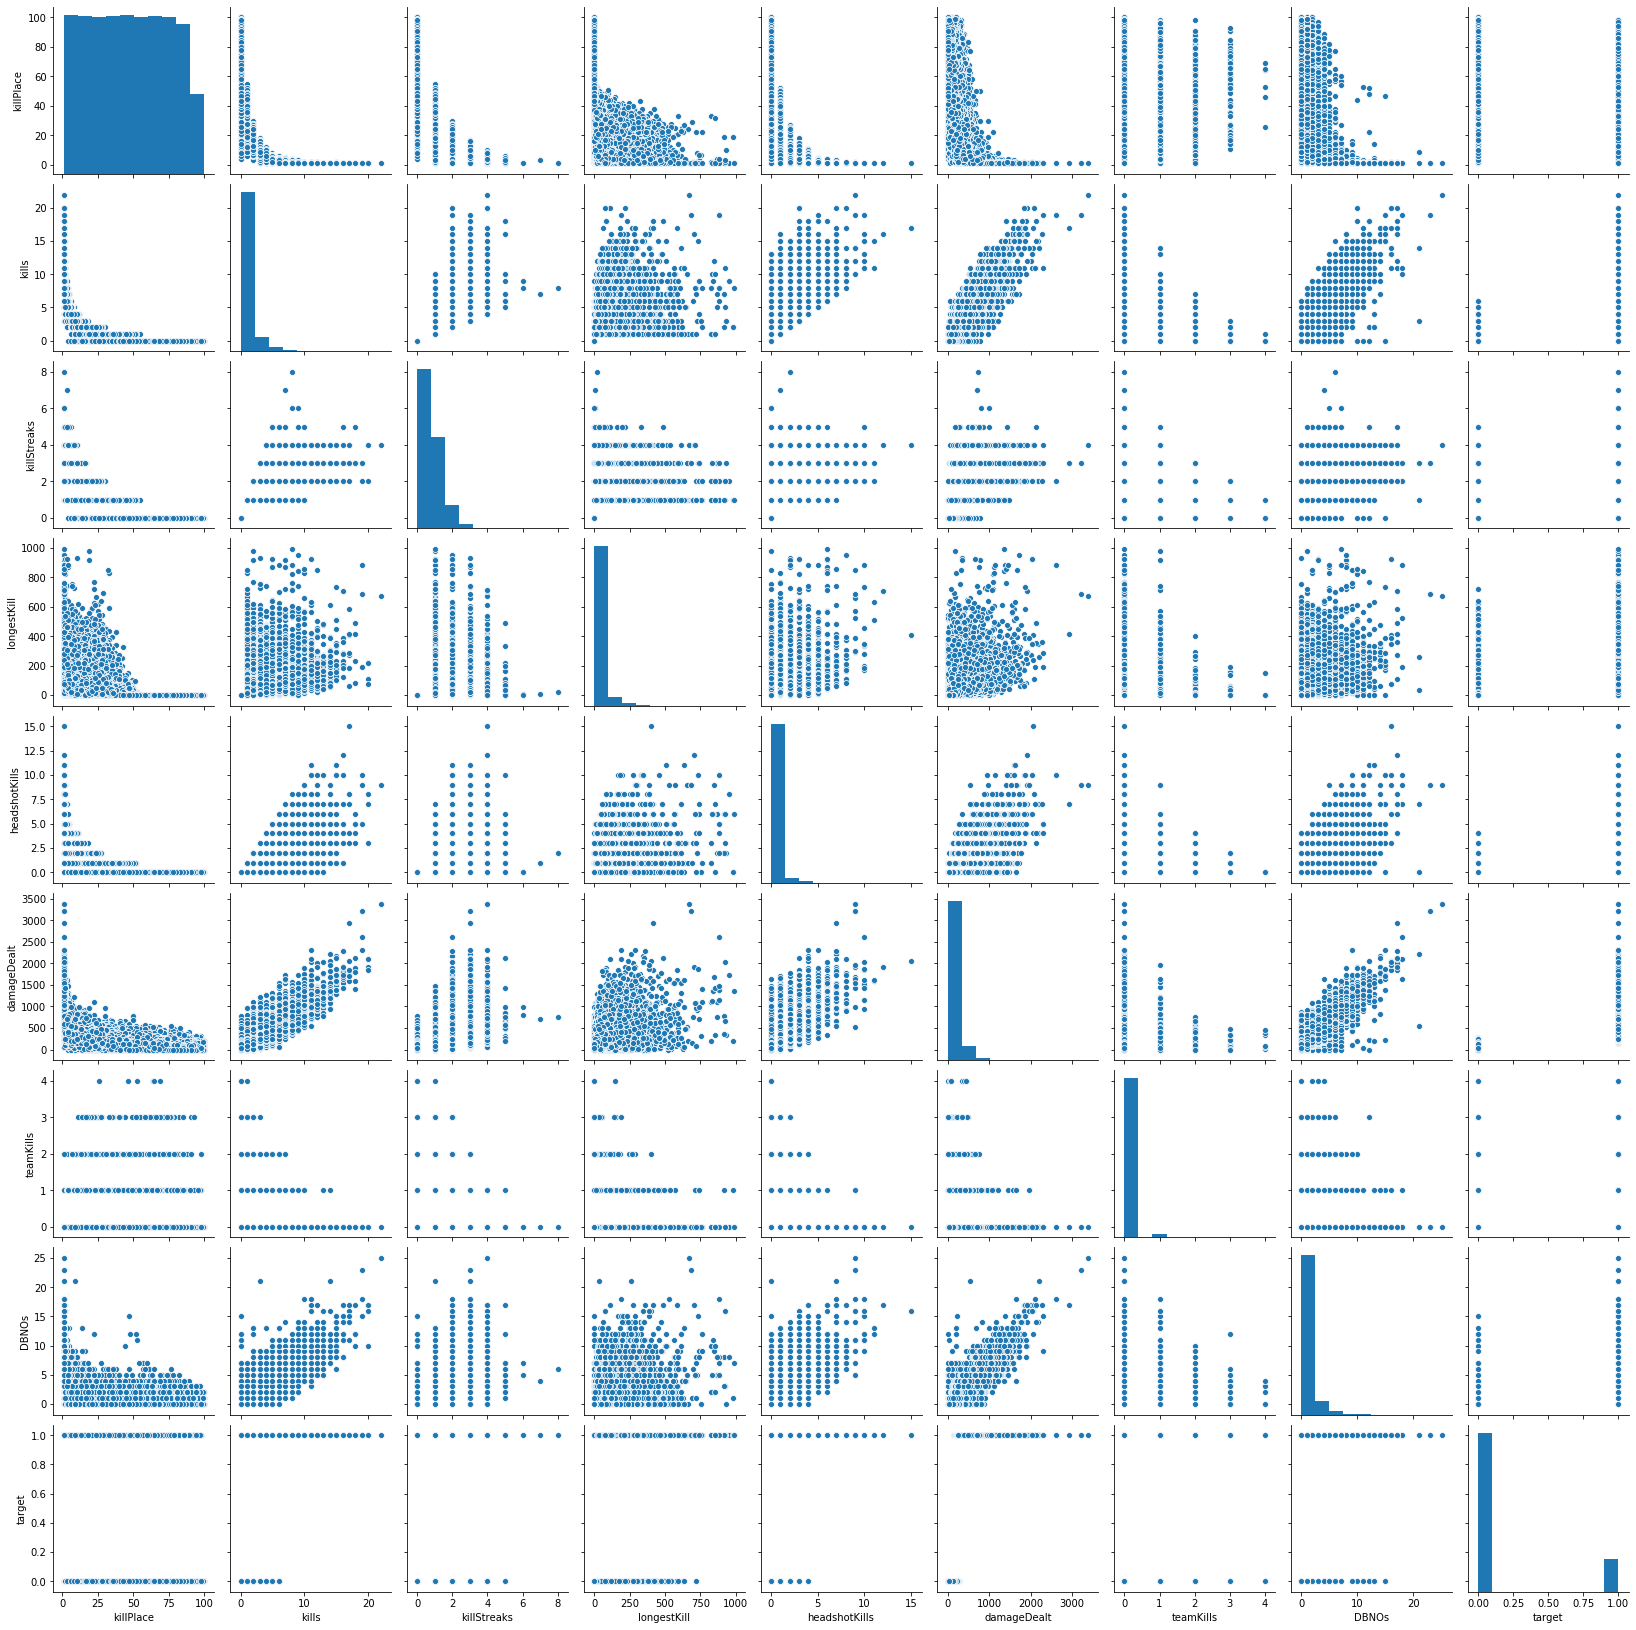

In [50]:
import seaborn as sns
sns.pairplot(result_squad_1,palette='bright')
plt.show()

# 회귀분석

- test data load

In [51]:
test = pd.read_csv('C:/Users/sundooedu/Desktop/test_data_cheatUser.csv')

## VotingClassifier

- DecisionTree
- LogisticRegression
- RandomForest 

In [52]:
X = result_squad_1[['killPlace','kills','killStreaks',\
                        'longestKill','headshotKills','damageDealt','teamKills','DBNOs']]
y = result_squad_1['target']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier


clflog = LogisticRegression(random_state=1)
clfdt = DecisionTreeClassifier(random_state=1)
clfrf = RandomForestClassifier()

eclf_h =VotingClassifier(estimators = [('log',clflog),('dt',clfdt),('rf',clfrf),],voting='hard')
eclf_s =VotingClassifier(estimators = [('log',clflog),('dt',clfdt),('rf',clfrf)],voting='soft')
models = [clflog,clfdt,clfrf,eclf_h,eclf_s]

In [55]:
for model in models:
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  score = model.score(X_test,y_test)
  print(score)

C:\Users\sundooedu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9960269718250748
0.9988808371338239
0.9987829103830335


C:\Users\sundooedu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9989787638846143


C:\Users\sundooedu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9991186592428863
